In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [2]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y

In [3]:
def gen_data(nobs=1000, a=0.25, num_params=4):
    x = np.random.normal(scale=1., size=(nobs,num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x.sum(axis=1) + e
    return y,x,nobs

In [4]:
def setup_model(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    model1_deriv = OLS_loglike(yn,sm.add_constant(xn))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    return ll1,grad1,hess1,params1


def setup_test(yn,xn):
    lls = []
    grads = []
    hesss = []
    params = []                
    for i in range(xn.shape[1]):
        ll,grad,hess,param = setup_model(yn,xn[:,i])
        lls.append(ll)
        grads.append(grad)
        hesss.append(hess)
        params.append(param)
    
    #determine 1 and 2
    lls_sum = np.array(lls).sum(axis=1)
    lls_sorted = lls_sum.copy()
    lls_sorted.sort()
    ind1,ind2 = lls_sorted[-2:]
    ind1 = (lls_sum == ind1).argmax()
    ind2 = (lls_sum == ind2).argmax()
    return lls[ind1],grads[ind1],hesss[ind1],params[ind1], lls[ind2],grads[ind2],hesss[ind2],params[ind2]

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_test(yn,xn)

# K = 4

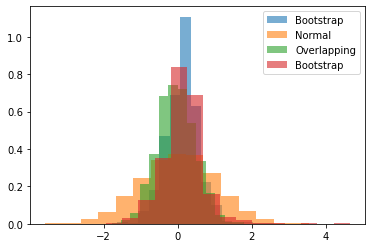

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.130 & 0.203 & 0.019 & 0.081 & 0.019 & 0.204 \\
Bootstrap & 0.154 & 0.311 & 0.154 & 0.673 & 0.154 & 0.956 \\
Normal & 0.012 & 1.010 & -0.041 & -0.025 & -0.041 & 3.030 \\
Overlapping & -0.039 & 0.256 & 0.007 & -0.001 & 0.007 & 0.195 \\
\bottomrule
\end{tabular}
\end{center}


In [5]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=4)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

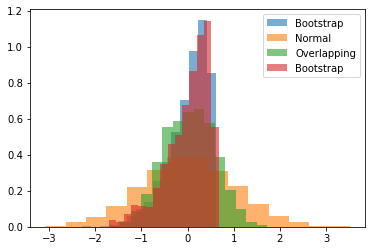

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.009 & 0.190 & -0.099 & 0.056 & -0.099 & 0.164 \\
Bootstrap & 0.012 & 0.220 & -0.115 & 0.045 & -0.115 & 0.190 \\
Normal & 0.017 & 1.005 & 0.056 & -0.092 & 0.056 & 2.935 \\
Overlapping & 0.040 & 0.302 & -0.001 & -0.038 & -0.001 & 0.235 \\
\bottomrule
\end{tabular}
\end{center}


In [6]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=4)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

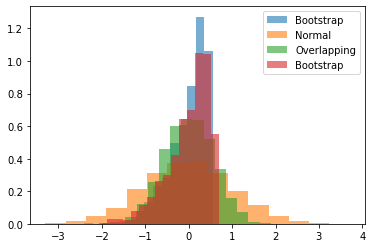

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.005 & 0.185 & -0.101 & 0.063 & -0.100 & 0.165 \\
Bootstrap & 0.003 & 0.242 & -0.134 & 0.063 & -0.134 & 0.238 \\
Normal & -0.018 & 0.996 & -0.017 & -0.088 & -0.017 & 2.888 \\
Overlapping & 0.009 & 0.316 & -0.002 & -0.028 & -0.002 & 0.271 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=4)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

# K = 9

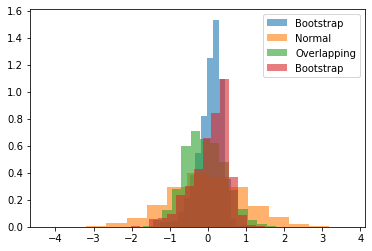

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.055 & 0.103 & -0.031 & 0.014 & -0.031 & 0.046 \\
Bootstrap & 0.066 & 0.245 & -0.108 & 0.049 & -0.108 & 0.228 \\
Normal & -0.014 & 1.000 & -0.000 & 0.163 & -0.000 & 3.159 \\
Overlapping & -0.088 & 0.281 & 0.023 & -0.014 & 0.023 & 0.222 \\
\bottomrule
\end{tabular}
\end{center}


In [8]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=9)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

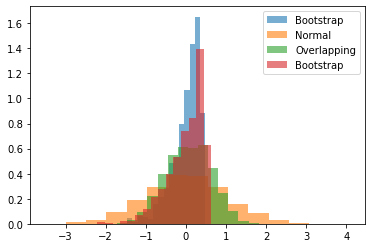

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.008 & 0.121 & -0.058 & 0.030 & -0.057 & 0.074 \\
Bootstrap & 0.009 & 0.196 & -0.106 & 0.064 & -0.106 & 0.178 \\
Normal & -0.004 & 1.013 & -0.017 & 0.035 & -0.017 & 3.113 \\
Overlapping & 0.066 & 0.315 & -0.018 & -0.038 & -0.018 & 0.260 \\
\bottomrule
\end{tabular}
\end{center}


In [9]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=9)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

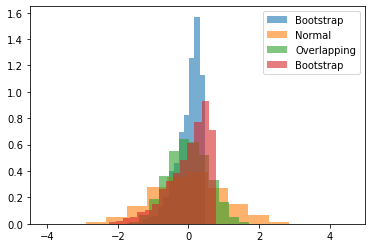

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.005 & 0.117 & -0.047 & 0.019 & -0.047 & 0.060 \\
Bootstrap & 0.007 & 0.339 & -0.209 & 0.086 & -0.209 & 0.429 \\
Normal & -0.004 & 1.008 & -0.009 & -0.026 & -0.009 & 3.021 \\
Overlapping & -0.007 & 0.320 & 0.001 & -0.036 & 0.001 & 0.272 \\
\bottomrule
\end{tabular}
\end{center}


In [10]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=9)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

# K = 19

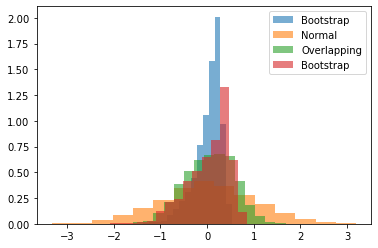

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.035 & 0.080 & -0.028 & 0.012 & -0.028 & 0.031 \\
Bootstrap & 0.053 & 0.206 & -0.094 & 0.041 & -0.094 & 0.167 \\
Normal & 0.010 & 0.999 & -0.028 & -0.090 & -0.028 & 2.904 \\
Overlapping & 0.052 & 0.273 & -0.019 & -0.026 & -0.019 & 0.198 \\
\bottomrule
\end{tabular}
\end{center}


In [11]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=19)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

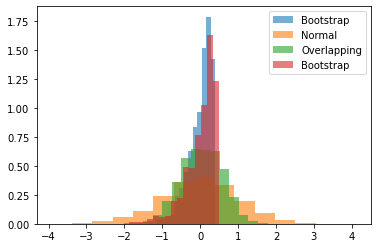

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.007 & 0.088 & -0.031 & 0.010 & -0.030 & 0.033 \\
Bootstrap & 0.012 & 0.154 & -0.094 & 0.066 & -0.093 & 0.137 \\
Normal & 0.002 & 1.012 & -0.062 & 0.157 & -0.062 & 3.228 \\
Overlapping & 0.045 & 0.298 & -0.013 & -0.017 & -0.013 & 0.249 \\
\bottomrule
\end{tabular}
\end{center}


In [12]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=19)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

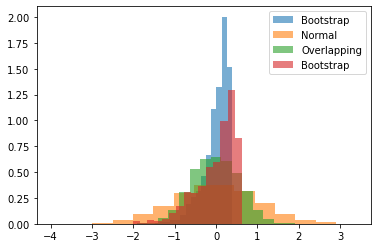

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.006 & 0.087 & -0.036 & 0.017 & -0.036 & 0.039 \\
Bootstrap & 0.011 & 0.230 & -0.136 & 0.072 & -0.135 & 0.230 \\
Normal & -0.007 & 1.024 & -0.045 & -0.031 & -0.045 & 3.111 \\
Overlapping & -0.009 & 0.314 & 0.001 & -0.026 & 0.001 & 0.270 \\
\bottomrule
\end{tabular}
\end{center}


In [13]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=19)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)